<a href="https://colab.research.google.com/github/Hari-Penumudi/Data-Analysis-of-OTT-platform/blob/main/Netflix_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install gitly


  Preparing metadata (setup.py) ... done
  Created wheel for gitly: filename=gitly-1.1.4-py3-none-any.whl size=4502 sha256=095871683bcdc83c56f9f5c1587c941bb120abc33ce11ce548f2b1e4cebff5cd
  Stored in directory: /root/.cache/pip/wheels/ac/6f/10/804eecc1778739e42d96317afd1248452cd6f1fe4c7eb56cde
Successfully built gitly


# * Importing Libraries

In [20]:
# importing libraries -
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from gitly.colab.plot import GitlyPlotter


# * Loading Dataset

In [21]:
!gdown 13nPuO4TwmN21vZcz0ApLbtyBJcoVLqQE

Downloading...
From: https://drive.google.com/uc?id=13nPuO4TwmN21vZcz0ApLbtyBJcoVLqQE
To: /content/netflix_titles.csv
100% 3.40M/3.40M [00:00<00:00, 45.7MB/s]


# * Concise Summary

In [22]:
data = pd.read_csv('netflix_titles.csv')
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [23]:
data["date_added"] = pd.to_datetime(data['date_added'])
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,7.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0


# * Handling Duplicates

In [24]:
data.duplicated().sum()

0

In [25]:
# length of data -

len(data)

8807

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8797 non-null   float64       
 13  month_added   8797 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 963.4+ KB


In [27]:
# checking null values -

data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
year_added        10
month_added       10
dtype: int64

Ques. 1 - For separate analysis of movies & TV shows, it is important to first distinguish them. Find out what percentage of titles present in the dataset are TV shows and what percentage of them are movies? (i.e. TV shows: Movies)

ANS - 30:70

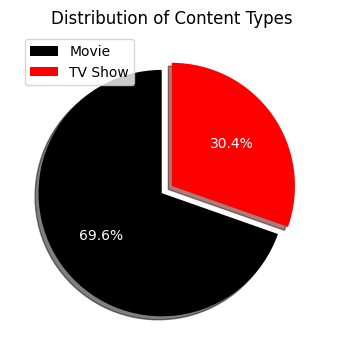

In [28]:
r= data['type'].value_counts(normalize=True) * 100

# Create a DataFrame to store the percentage distribution
mf_ratio = pd.DataFrame(r)
mf_ratio.rename({'type': '%'}, axis=1, inplace=True)

# Plot the 3D-effect pie chart
plt.figure(figsize=(4, 4))
colors = ['black','red']
explode = (0.1, 0)
plt.pie(mf_ratio['%'], labels=mf_ratio.index, autopct='%1.1f%%',
colors=colors, explode=explode, shadow=True, startangle=90,
textprops={'color': 'white'})

plt.legend(loc='upper left')
plt.title('Distribution of Content Types')
plt.show()


# Ques 2: unnesting of data values in requried columns is necessary before jumping onto the analysis part?

In [29]:
# unnesting the directors column -

constraint1=data['director'].apply(lambda x: str(x).split(', ')).tolist()
data_new1=pd.DataFrame(constraint1, index=data['title'])
data_new1=data_new1.stack()
data_new1=pd.DataFrame(data_new1.reset_index())
data_new1.rename(columns={0:'Director'}, inplace=True)
data_new1.drop(['level_1'], axis=1, inplace=True)
data_new1.head()

,title,Director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [30]:
# unnesting the cast column -

constraint2=data['cast'].apply(lambda x: str(x).split(', ')).tolist()
data_new2=pd.DataFrame(constraint2, index=data['title'])
data_new2=data_new2.stack()
data_new2=pd.DataFrame(data_new2.reset_index())
data_new2.rename(columns={0:'Cast'}, inplace=True)
data_new2.drop(['level_1'], axis=1, inplace=True)
data_new2.head()

,title,Cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [31]:
# unnesting the Listed_in(Genre) column -

constraint3=data['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
data_new3=pd.DataFrame(constraint3, index=data['title'])
data_new3=data_new3.stack()
data_new3=pd.DataFrame(data_new3.reset_index())
data_new3.rename(columns={0:'Genre'}, inplace=True)
data_new3.drop(['level_1'], axis=1, inplace=True)
data_new3.head()

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [32]:
# Count the number of Movies or TV shows as per Genre

data_new3.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],
                                                                                 ascending=False)

,Genre,title
16,International Movies,2752
12,Dramas,2427
7,Comedies,1674
17,International TV Shows,1351
10,Documentaries,869
0,Action & Adventure,859
34,TV Dramas,763
15,Independent Movies,756
4,Children & Family Movies,641
24,Romantic Movies,616


In [34]:
# Tell us about what the audience prefers to watch. So Netflix can decide what type of content they should publish to make the audience happy.

fig_donut = px.pie(data, names='type', height=300, width=600, hole=0.7,

title='Most watched on Netflix',

color_discrete_sequence=['black', 'red'])

fig_donut.update_traces(hovertemplate=None, textposition='outside',

textinfo='percent+label', rotation=180)

fig_donut.update_layout(margin=dict(t=60, b=30, l=0, r=0), showlegend=False,

 paper_bgcolor='white',

title_font=dict(size=25, color='Black', family="Lato, sans-serif"),

font=dict(size=17, color='black'),

hoverlabel=dict(bgcolor="white", font_size=13,

font_family="Arial"))

In [35]:
# Comparison between the TV shows and Movies vs Ratings. Creating a combined bar chat for a user that can easily understand the difference.

# making a copy of df
dff = data.copy()

# making 2 df one for tv show and another for movie with rating
df_tv_show = dff[dff['type']=='TV Show'][['rating', 'type']].rename(columns={'type':'tv_show'})
df_movie = dff[dff['type']=='Movie'][['rating', 'type']].rename(columns={'type':'movie'})
df_tv_show = pd.DataFrame(df_tv_show.rating.value_counts()).reset_index().rename(columns={'index':'tv_show'})
df_tv_show['rating_final'] = df_tv_show['rating']

# making rating column value negative
df_tv_show['rating'] *= -1
df_movie = pd.DataFrame(df_movie.rating.value_counts()).reset_index().rename(columns={'index':'movie'})

In [36]:
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_yaxes=True, horizontal_spacing=0)
# bar plot for tv shows
fig.append_trace(go.Bar(x=df_tv_show.rating, y=df_tv_show.tv_show, orientation='h', showlegend=True,
                        text=df_tv_show.rating_final, name='TV Show', marker_color='#221f1f'), 1, 1)
# bar plot for movies
fig.append_trace(go.Bar(x=df_movie.rating, y=df_movie.movie, orientation='h', showlegend=True, text=df_movie.rating,
                        name='Movie', marker_color='#b20710'), 1, 2)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_layout(title='Which has the highest rating TV shows or Movies?',
                  margin=dict(t=80, b=0, l=70, r=40),
                  hovermode="y unified",
                  xaxis_title=' ', yaxis_title=" ",
                  plot_bgcolor='white', paper_bgcolor='white',
                  title_font=dict(size=25, color='black'),
                  font=dict(color='red'),
                  legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
                  hoverlabel=dict(bgcolor="black", font_size=13))


In [37]:
# Deriving the best time to release content

data_month = pd.DataFrame(data.month_added.value_counts()).reset_index().rename(columns={'index':'month','month_added':'count'})

# converting month number to month name for better Visualization

data_month['month_final'] = data_month['month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
data_month[:2]

,month,count,month_final
0,7.0,827,July
1,12.0,813,Dec


In [38]:
fig_month = px.funnel(data_month, x='count', y='month_final', title='Best month for releasing Content',
                      height=350, width=600, color_discrete_sequence=['red'])
fig_month.update_xaxes(showgrid=False, ticksuffix=' ', showline=True)
fig_month.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig_month.update_layout(margin=dict(t=60, b=20, l=70, r=40),
                        xaxis_title=' ', yaxis_title=" ",
                        plot_bgcolor='black', paper_bgcolor='black',
                        title_font=dict(size=25, color='white'),
                        font=dict(color='white'),
                        hoverlabel=dict(bgcolor="black", font_size=13,))

# Conclusion:

- Data-Driven Insights: My data analysis journey showcased the power of data in unraveling the mysteries of Netflix’s content landscape, providing valuable insights for viewers and content creators.

- Content Addition: July emerged as the month when Netflix adds the most content, closely followed by December, indicating a strategic approach to content release.

- Rating Distribution: The distribution of ratings over the years offers insights into the evolving content landscape and audience reception.

- Continued Relevance: As the streaming industry evolves, understanding these patterns and trends becomes increasingly essential for navigating the dynamic landscape of Netflix and its vast library.


